# Project: classification of bank clients

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;">0. Introduction</p>
<div class="alert alert-info" role="alert">
    
<center> <img src="https://m.bankingexchange.com/media/k2/items/cache/cb89cba7f71671166c60733a6bf01429_M.jpg?t=20190514_203553"> 
    
  WHAT CASE DO WE DECIDE?   
   
We were provided with data on the latest marketing campaign conducted by the bank: the task was to attract customers to open a deposit. We must analyze this data, identify patterns and find the decisive factors that influenced the fact that the client invested money in this particular bank. If we can do this, we will raise the bank's income and help understand the target audience that needs to be attracted through advertising and various offers.
    
Let's look at the data that we have to work with.
    
    
<table >
   <tr>
    <th>Column</th>
    <th>Description</th>
  </tr>
  
   <tr>
    <td>age</td>
    <td>age </td>
  </tr>
    
   <tr>
    <td>marital</td>
    <td>marital status </td>
  </tr> 
    
  <tr>
    <td>education</td>
    <td>level of education</td>
  </tr>
    
  <tr>
    <td>default</td>
    <td>whether a client has an overdue loan </td>
  </tr>
    
   <tr>
    <td>housing</td>
    <td>whether a client has a housing loan</td>
  </tr>
    
   <tr>
    <td>loan</td>
    <td>whether a client has a consumer loan </td>
  </tr>
    
   <tr>
    <td>balance </td>
    <td>current balance </td>
  </tr> 
   
   <tr>
    <td>contact </td>
    <td>type of contact with a client </td>
  </tr>  
    
   <tr>
    <td>month </td>
    <td>a month in which last contact was made </td>
  </tr>  
    
   <tr>
    <td>day</td>
    <td>a day when the last contact was made </td>
  </tr> 
    
   <tr>
    <td>duration</td>
    <td>contact duration in seconds </td>
  </tr> 
    
  <tr>
    <td>campaign</td>
    <td>a number of contacts with this client during the current campaign </td>
  </tr> 
    
   <tr>
    <td>pdays</td>
    <td>a number of days missed from the last marketing campaign to the contact in the current campaign </td>
  </tr> 
    
   <tr>
    <td>previous</td>
    <td>number of contacts before the current campaign </td>
  </tr> 
    
   <tr>
    <td>poutcome</td>
    <td>the result of a past marketing campaign</td>
  </tr> 
    
   <tr>
    <td>deposit</td>
    <td>our target variable is deposit, which determines whether the client agrees to open a deposit with the bank. This is what we will try to predict in this case. </td>
  </tr> 
    
</table>
    
</div>

# <p style="border:3px solid DodgerBlue;text-align:center;font-size:100%;">1. Uploading and analysing of datasets</p> 
<h2>1.1. Import libraries</h2> 

In [192]:
import pandas as pd # management of dataframes
import numpy as np # math

# Graphs and plots
import matplotlib.pyplot as plt
import seaborn as sns

# Additional libraries
import sweetviz as sv
from ydata_profiling import ProfileReport
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import optuna


<h2 >1.2. Fixing</h2> 

In [193]:
# commiting the package version to make the experiments repeatable:
!pip freeze > requirements.txt

<h2 >1.3. Import and review of dataset</h2> 

In [194]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

    We can start with abscent values. Seems like there are only 25 missing values in 'Balance' column. But further we will need to check if some of missing values have not been hidden under other names.

In [195]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [196]:
df.describe(include='all')

age         job  marital  education default balance housing  \
count   11162.000000       11162    11162      11162   11162   11137   11162   
unique           NaN          12        3          4       2    3802       2   
top              NaN  management  married  secondary      no   0  $       no   
freq             NaN        2566     6351       5476   10994     774    5881   
mean       41.231948         NaN      NaN        NaN     NaN     NaN     NaN   
std        11.913369         NaN      NaN        NaN     NaN     NaN     NaN   
min        18.000000         NaN      NaN        NaN     NaN     NaN     NaN   
25%        32.000000         NaN      NaN        NaN     NaN     NaN     NaN   
50%        39.000000         NaN      NaN        NaN     NaN     NaN     NaN   
75%        49.000000         NaN      NaN        NaN     NaN     NaN     NaN   
max        95.000000         NaN      NaN        NaN     NaN     NaN     NaN   

         loan   contact           day  month      duration      campaign  \
count   11162     11162  11162.000000  11162  11162.000000  11162.000000   
unique      2         3           NaN     12           NaN           NaN   
top        no  cellular           NaN    may           NaN           NaN   
freq     9702      8042           NaN   2824           NaN           NaN   
mean      NaN       NaN     15.658036    NaN    371.993818      2.508421   
std       NaN       NaN      8.420740    NaN    347.128386      2.722077   
min       NaN       NaN      1.000000    NaN      2.000000      1.000000   
25%       NaN       NaN      8.000000    NaN    138.000000      1.000000   
50%       NaN       NaN     15.000000    NaN    255.000000      2.000000   
75%       NaN       NaN     22.000000    NaN    496.000000      3.000000   
max       NaN       NaN     31.000000    NaN   3881.000000     63.000000   

               pdays      previous poutcome deposit  
count   11162.000000  11162.000000    11162   11162  
unique           NaN           NaN        4       2  
top              NaN           NaN  unknown      no  
freq             NaN           NaN     8326    5873  
mean       51.330407      0.832557      NaN     NaN  
std       108.758282      2.292007      NaN     NaN  
min        -1.000000      0.000000      NaN     NaN  
25%        -1.000000      0.000000      NaN     NaN  
50%        -1.000000      0.000000      NaN     NaN  
75%        20.750000      1.000000      NaN     NaN  
max       854.000000     58.000000      NaN     NaN

<h2>1.4. Cheking dataset for outliers, duplicates and missing values</h2> 

    As expected in 'Job' and 'Education' columns we can see 'unknown' values. Probably should change them during feature engineering.

In [198]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [199]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


    We have found missing values, and we would like to process them now. However, we cannot do this, since not all data is presented in the correct form.

    Pay attention to the balance sign: the data contains an extra comma and a dollar sign. For this reason, this feature is not read as a number. Have to process this feature data so that it is converted to a float.


In [200]:
def get_float_balance(value):
    if isinstance(value, float) is False:
        clean_value = value.replace(' ', '').replace(',', '.').replace('$', '')
        return float(clean_value)
    else:
        return value
    
df['balance'] = df['balance'].apply(get_float_balance)
df['balance'] = df['balance'].astype('float')


    So, values in the 'balance' feature have float type, and now we can process the gaps that are present in it. Of course, the gaps could simply be removed, but we will do it differently: we will replace the gaps with the median value for this feature.

In [203]:
df['balance'] = df['balance'].fillna(df['balance'].median())

    Earlier, we found out that there are missing values in the job attribute that are not explicitly displayed as NaN. However, it is still important for us to process them. We know that for categorical features, missing values are replaced by the mode for the given feature.


In [92]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
df['job'] = df['job'].apply(
    lambda x: df['job'].mode()[0] if x == 'unknown' else x)
df['education'] = df['education'].apply(
    lambda x: df['education'].mode()[0] if x == 'unknown' else x)

    Now we can process outliers in 'balance' feature. I'll use Tukey's method. 

### Алгоритм метода:

1. Вычислить 25-ую и 75-ую квантили (1 и 3 квартили) - $Q_{25}$ и $Q_{75}$ для признака, который мы исследуем
2. Вычислить межквартильное расстояние:  
    * $IQR=Q_{75}-Q_{25}$
3. Определить верхнюю и нижнюю границы Тьюки: 

    * $bound_{upper} = Q_{75} + 1.5*IQR$
    
    * $bound_{lower} = Q_{25} - 1.5*IQR$
4. Найти наблюдения, которые выходят за пределы границ

    Tukey's method shall be applied to data with normal distribution. Let's see how 'balance' feature is distributed.

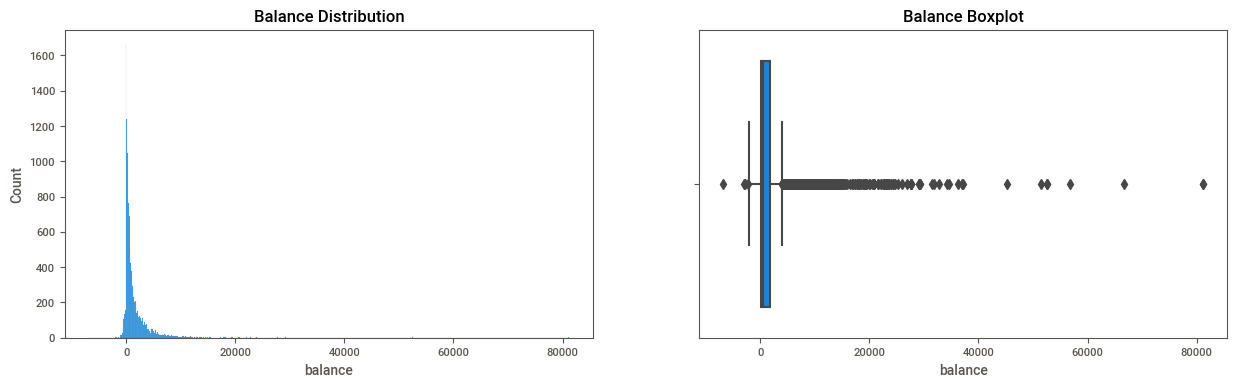

In [214]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
histplot.set_title('Balance Distribution');
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');

    We can notice a number of outliers detected after 20000 balance boarder.

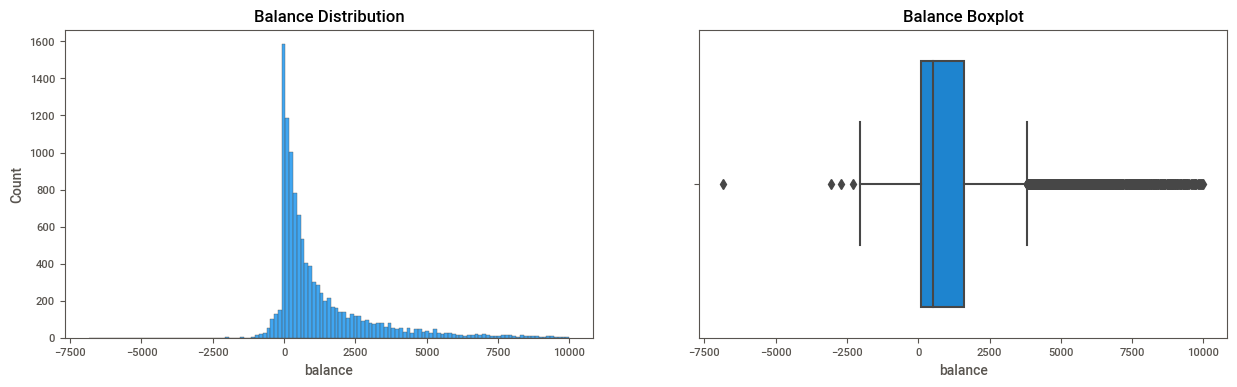

In [221]:
out_balance = df[df['balance'] < 10000]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=out_balance, x='balance', ax=axes[0]);
histplot.set_title('Balance Distribution');
boxplot = sns.boxplot(data=out_balance, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');

    It's hard to characterise balance distribution as normal or at least symmetric. However we can use log function to update it. Here's result:

In [94]:
# удалите все выбросы для признака balance
# ваш код

In [208]:
def find_outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False):
    """
    Находит выбросы в данных, используя метод межквартильного размаха. 
    Классический метод модифицирован путем добавления:
    * возможности логарифмирования распредления
    * ручного управления количеством межквартильных размахов в обе стороны распределения
    Args:
        data (pandas.DataFrame): набор данных
        feature (str): имя признака, на основе которого происходит поиск выбросов
        left (float, optional): количество межквартильных размахов в левую сторону распределения. По умолчанию 1.5.
        right (float, optional): количество межквартильных размахов в правую сторону распределения. По умолчанию 1.5.
        log_scale (bool, optional): режим логарифмирования. По умолчанию False - логарифмирование не применяется.

    Returns:
        pandas.DataFrame: наблюдения, попавшие в разряд выбросов
        pandas.DataFrame: очищенные данные, из которых исключены выбросы
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = find_outliers_iqr(df, 'balance', log_scale=True)

print(f'Number of outliers: {outliers.shape[0]}')
print(f'Remaining data (cleaned): {cleaned.shape[0]}')

FloatingPointError: divide by zero encountered in log

## Часть 2:  Разведывательный анализ

### Задание 1

no     5424
yes    4681
Name: deposit, dtype: int64

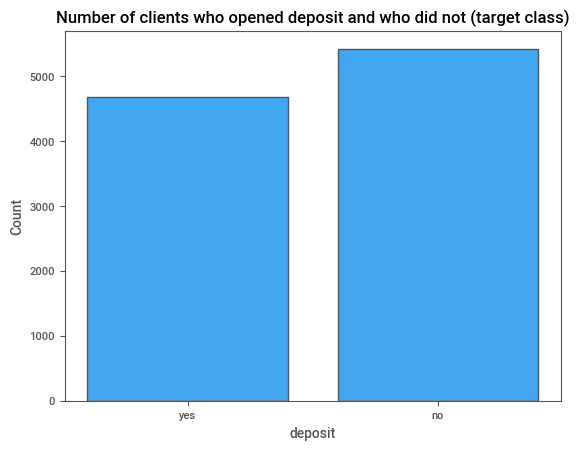

In [97]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
sns.histplot(cleaned, x='deposit', shrink=.8).set(title='Number of clients who opened deposit and who did not (target class)')

cleaned['deposit'].value_counts()

### Задания 2 и 3

In [98]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
cleaned.describe()

age       balance           day      duration      campaign  \
count  10105.000000  10105.000000  10105.000000  10105.000000  10105.000000   
mean      40.895497    807.653538     15.590302    368.742603      2.517170   
std       11.734931    994.151966      8.441510    346.651524      2.707159   
min       18.000000  -2049.000000      1.000000      2.000000      1.000000   
25%       32.000000     95.000000      8.000000    137.000000      1.000000   
50%       38.000000    445.000000     15.000000    252.000000      2.000000   
75%       48.000000   1227.000000     22.000000    490.000000      3.000000   
max       95.000000   4063.000000     31.000000   3881.000000     43.000000   

              pdays      previous  
count  10105.000000  10105.000000  
mean      51.319644      0.816230  
std      109.644179      2.243795  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%        2.000000      1.000000  
max      854.000000     58.000000

In [99]:
profile = ProfileReport(cleaned, title="Pandas Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
report = sv.analyze(cleaned)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
ERROR: comet_ml is installed, but not configured properly (e.g. check API key setup). HTML reports will not be uploaded.


In [101]:
types = cleaned.dtypes
cat_features = list(types[(types == 'object')].index)
num_features = list(types[(types == 'float64') | (types == 'int64')].index)

In [102]:
# creating two datasets for those who opened deposit and who did not
success = cleaned[cleaned['deposit'] == 'yes']
failure = cleaned[cleaned['deposit'] == 'no']

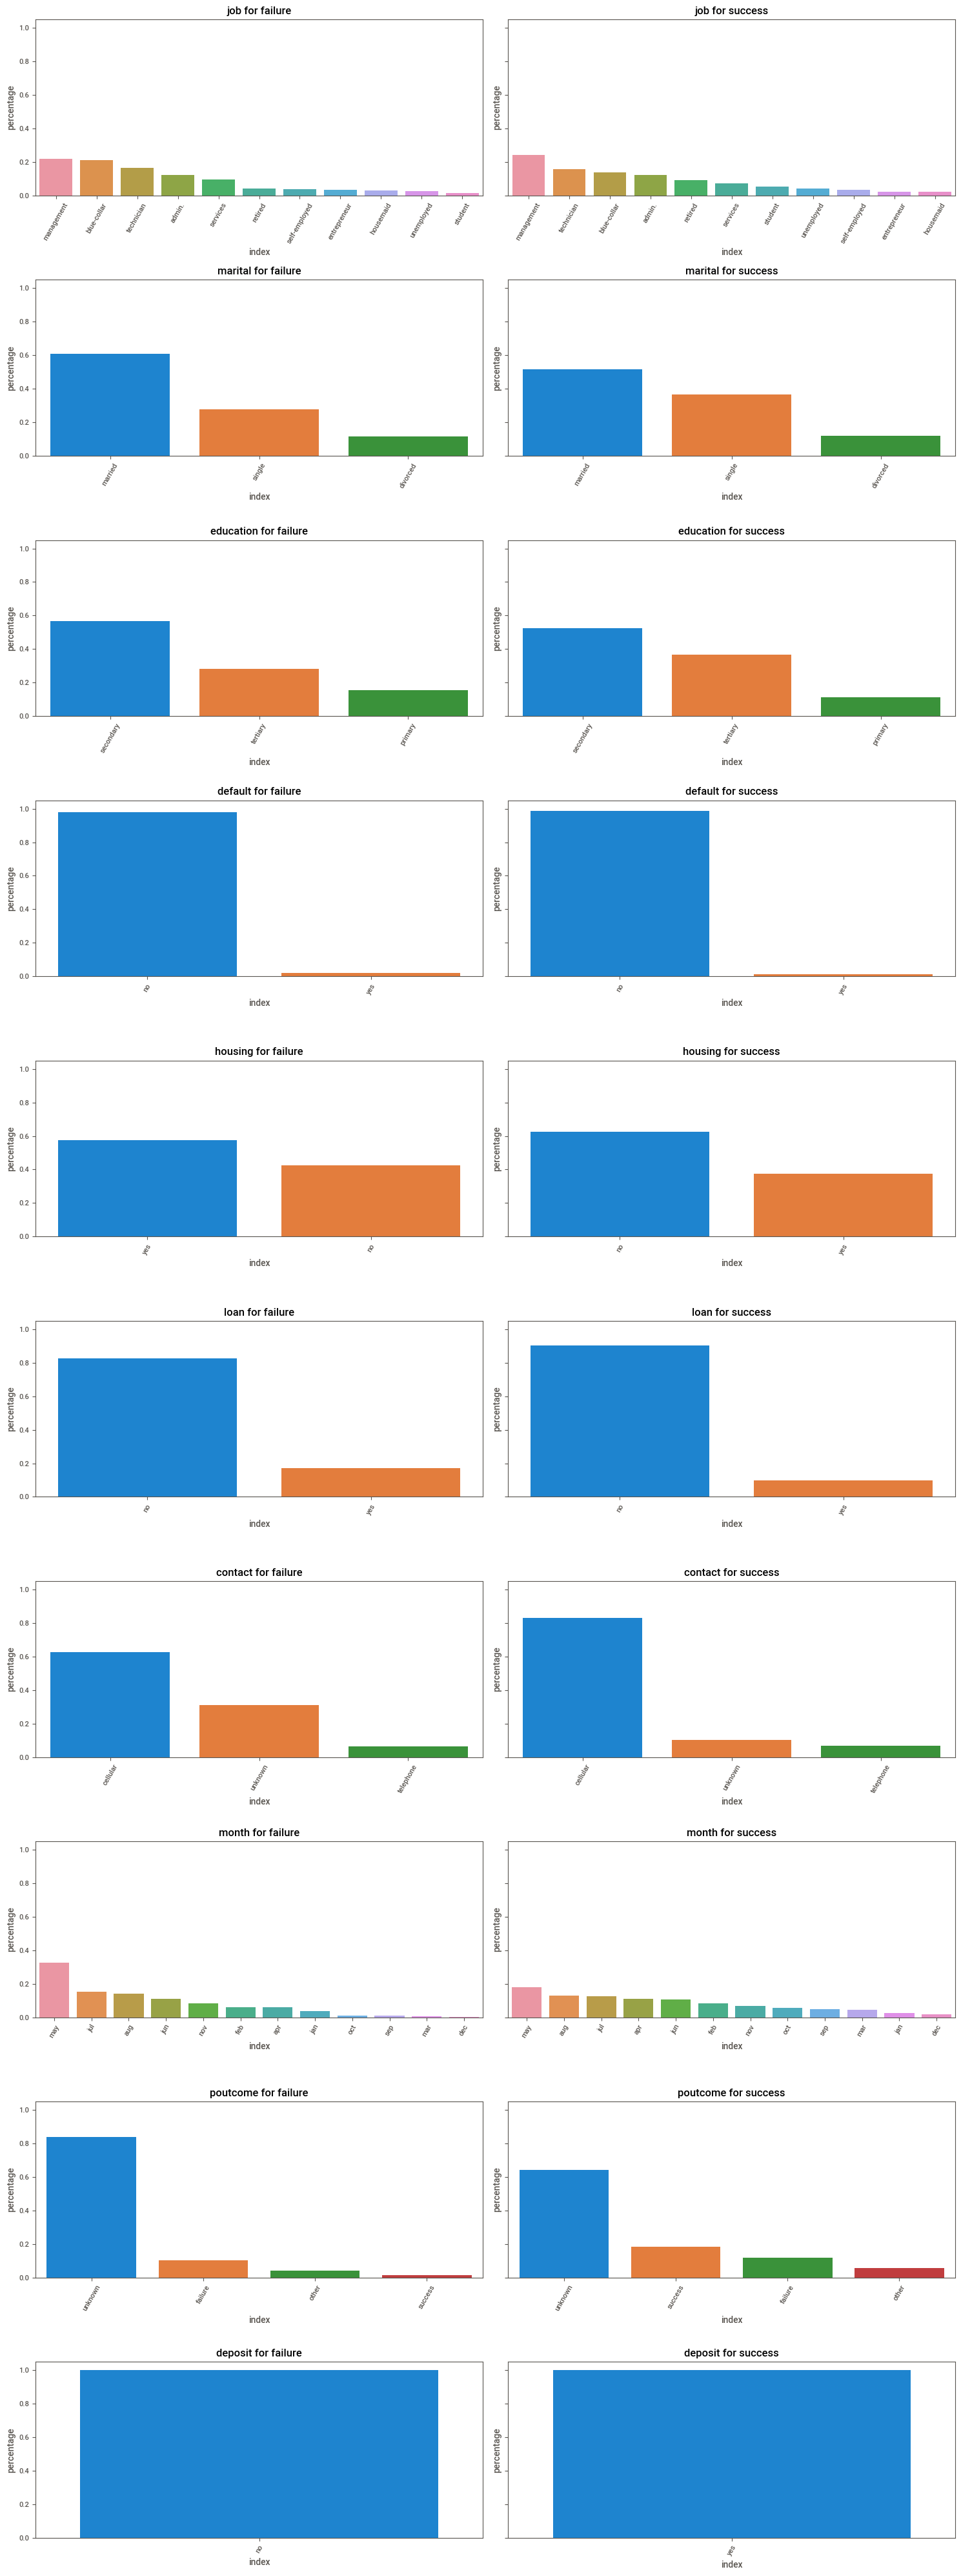

In [103]:
n = len(cat_features) #number of categorial features
fig, axes = plt.subplots(n, 2, figsize=(15, 40), sharey='all') #figure+n*2 coordinate axes with same y-scale
#creating cycle for categorial features
for i, feature in enumerate(cat_features):
    #building percented barplots for on the left for clients who did not open deposit (failure)
    count_data_f = (failure[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index())
    count_barplot = sns.barplot(
        data=count_data_f, 
        x='index', 
        y='percentage', 
        ax=axes[i][0]
        )
    count_barplot.xaxis.set_tick_params(rotation=60)
    count_barplot.set(title=f'{feature} for failure')
    #building percented barplots for on the right for clients who opened deposit (success)
    count_data_s = (success[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index())
    count_barplot = sns.barplot(
        data=count_data_s, 
        x='index', 
        y='percentage', 
        ax=axes[i][1]
        )
    count_barplot.xaxis.set_tick_params(rotation=60)
    count_barplot.set(title=f'{feature} for success')
plt.tight_layout() #alignment of features

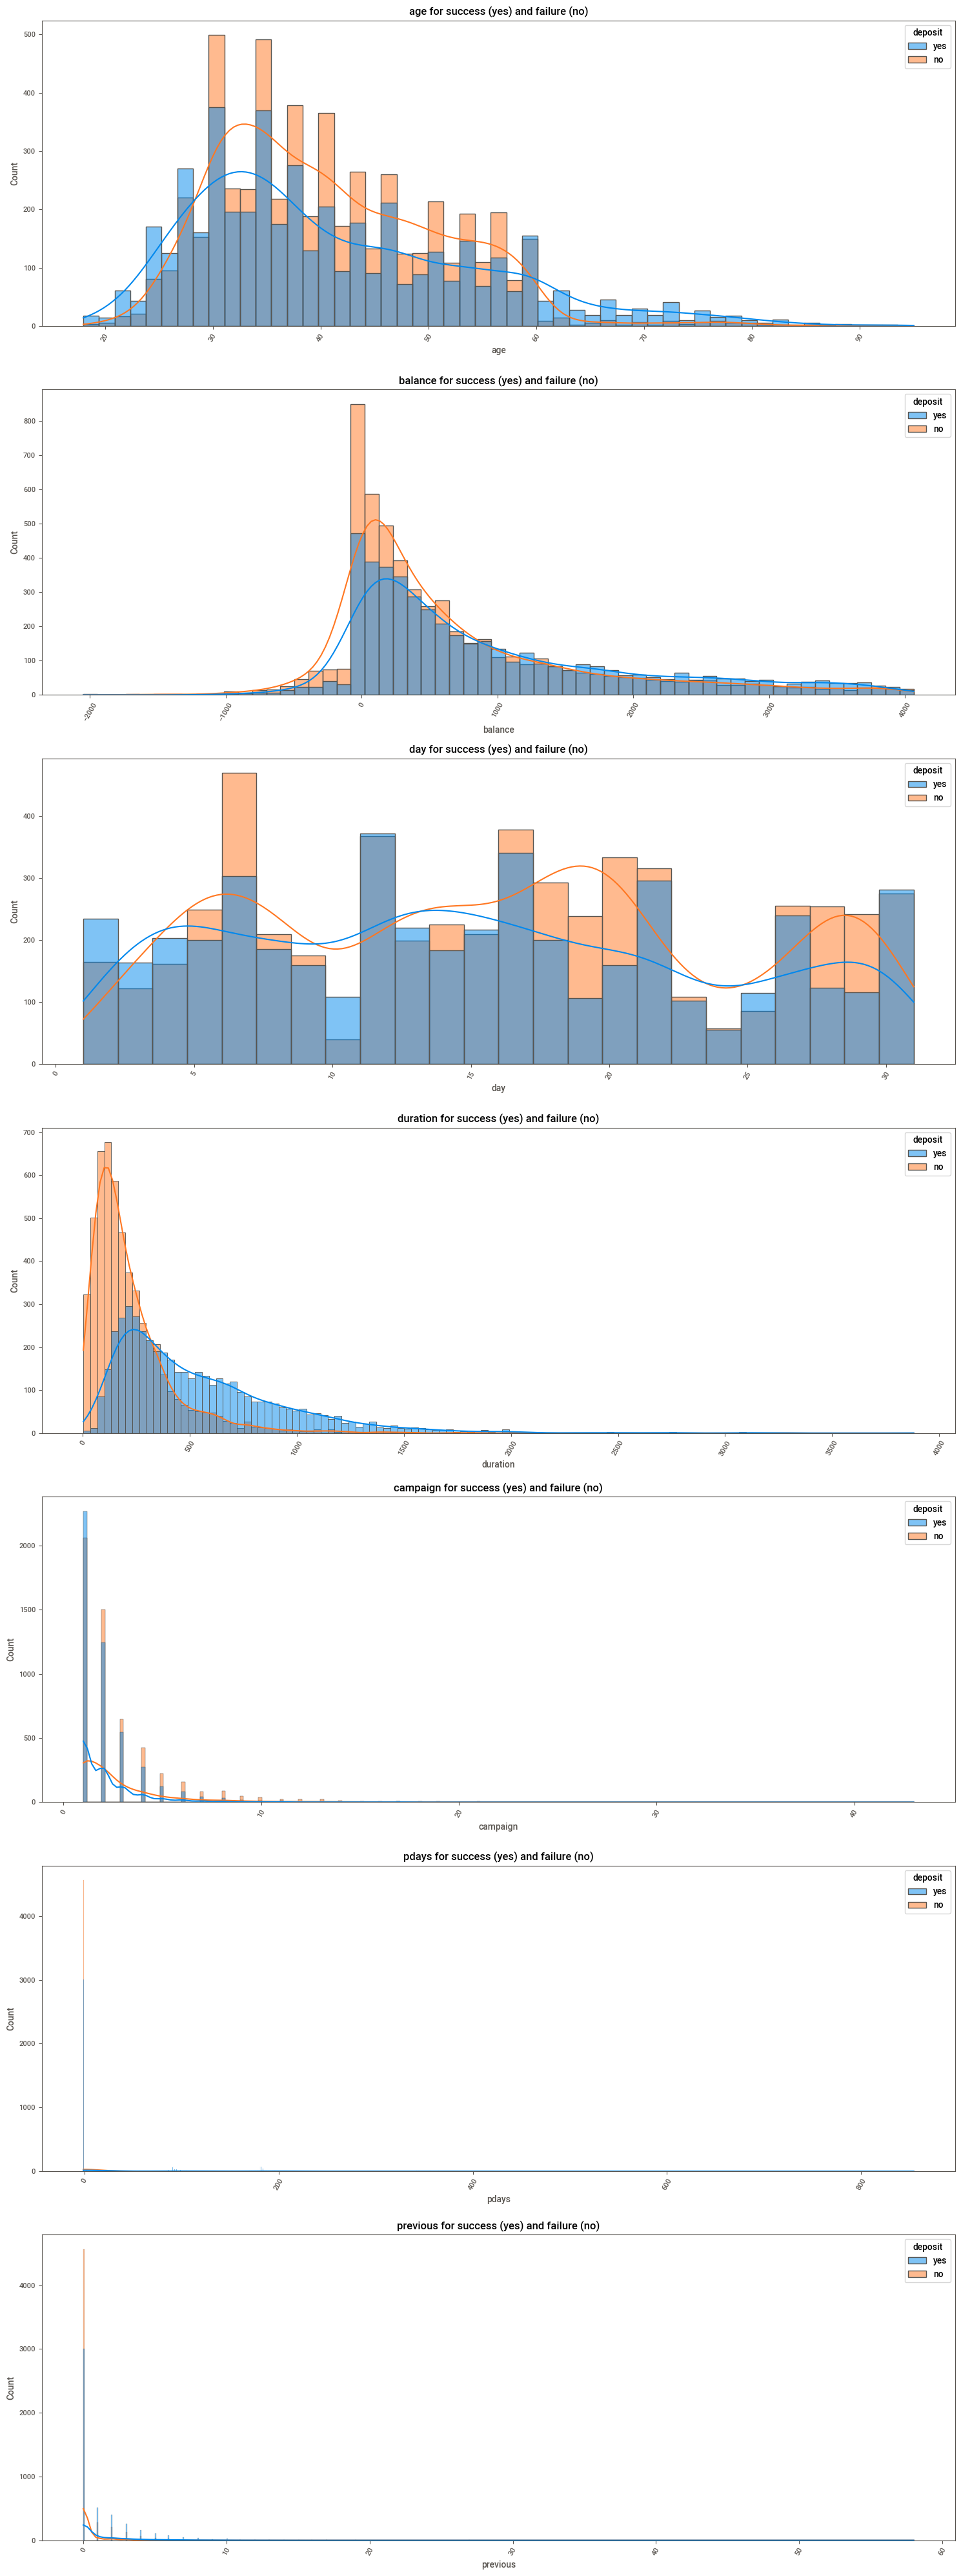

In [104]:
n = len(num_features) #number of numerical features
fig, axes = plt.subplots(n, 1, figsize=(15, 40)) #figure+n*2 coordinate axes with same y-scale
#creating cycle for categorial features
for i, feature in enumerate(num_features):
    #building percented barplots for on the left for clients who did not open deposit (failure)
    count_histplot = sns.histplot(
        data=cleaned,
        x=feature, 
        hue='deposit',
        kde=True,
        ax=axes[i]
        )
    count_histplot.xaxis.set_tick_params(rotation=60)
    count_histplot.set(title=f'{feature} for success (yes) and failure (no)')

plt.tight_layout() #alignment of features

### Задания 4 и 5

In [105]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

In [106]:
def get_top_unique_values(df, level=0):
    """
    Функция для получения инфомации по уникальным значениям в признаках

    :param df: Датафрейм для анализа
    :param level: Уровень уникальности в %, признаки ниже этого уровня не выводятся
    :return: Возвращает датафрейм с именем признака, количестве уникальных значений, наиболее часто повторяющимся
    уникальным значением, сколько % от выборки это значение занимает, количество повторов
    """

    cols = list(df.columns)

    # создаём пустой список
    unique_list = []

    for col in cols:
        col_lev = round(df[col].value_counts(normalize=True).values[0] * 100, 2)

        if col_lev > level:
            item = (col, df[col].nunique(), df[col].value_counts(normalize=True).index[0], col_lev,
                    df[col].value_counts().values[0])
            # добавляем кортеж в список
            unique_list.append(item)

    unique_values = pd.DataFrame(
        unique_list,
        columns=['Column Name', 'Count Unique', 'Top Value', 'Top Value %', 'Top Value Count']
    )

    return unique_values

get_top_unique_values(cleaned)

Column Name  Count Unique   Top Value  Top Value %  Top Value Count
0          age            76          31         4.54              459
1          job            11  management        22.91             2315
2      marital             3     married        56.56             5715
3    education             3   secondary        54.60             5517
4      default             2          no        98.36             9939
5      balance          2963         0.0         7.66              774
6      housing             2          no        51.89             5243
7         loan             2          no        86.21             8712
8      contact             3    cellular        72.07             7283
9          day            31          18         4.88              493
10       month            12         may        25.90             2617
11    duration          1390         161         0.36               36
12    campaign            35           1        42.86             4331
13       pdays           458          -1        74.89             7568
14    previous            30           0        74.89             7568
15    poutcome             4     unknown        74.91             7570
16     deposit             2          no        53.68             5424

### Задание 6

In [107]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
cleaned.groupby(by='poutcome')['deposit'].value_counts()

poutcome  deposit
failure   no          562
          yes         547
other     yes         265
          no          216
success   yes         861
          no           84
unknown   no         4562
          yes        3008
Name: deposit, dtype: int64

### Задание 7

In [108]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
cleaned.groupby(by='month')['deposit'].value_counts(normalize=True).sort_values(ascending=False)

month  deposit
dec    yes        0.903226
mar    yes        0.898734
sep    yes        0.834532
oct    yes        0.814925
may    no         0.678640
apr    yes        0.618072
jan    no         0.608150
jul    no         0.589563
nov    no         0.584615
aug    no         0.559567
jun    no         0.548913
feb    yes        0.544429
       no         0.455571
jun    yes        0.451087
aug    yes        0.440433
nov    yes        0.415385
jul    yes        0.410437
jan    yes        0.391850
apr    no         0.381928
may    yes        0.321360
oct    no         0.185075
sep    no         0.165468
mar    no         0.101266
dec    no         0.096774
Name: deposit, dtype: float64

### Задание 8

In [109]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def set_age_cat(age):
    if age < 30:
        return '<30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    elif 50 <= age < 60:
        return '50-60'
    elif age >= 60:
        return '60+'

cleaned['age_category'] = cleaned['age'].apply(set_age_cat)
cleaned['age_category'].value_counts()

30-40    3961
40-50    2382
50-60    1654
<30      1455
60+       653
Name: age_category, dtype: int64

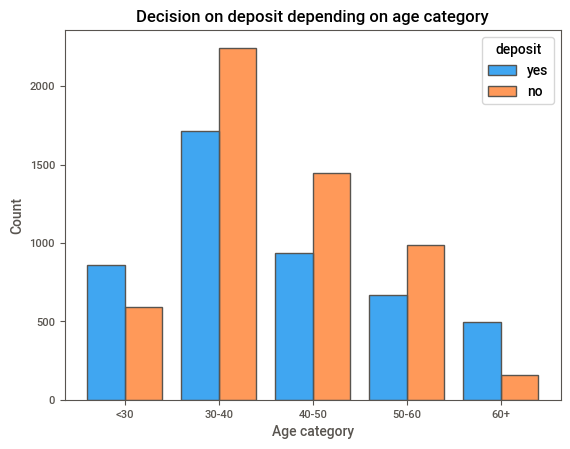

In [110]:
cleaned['age_category'] = pd.Categorical(cleaned['age_category'], ['<30', '30-40', '40-50', '50-60', '60+'])
age_histplot = sns.histplot(
    data=cleaned,
    x='age_category', 
    hue='deposit',
    shrink=0.8,
    discrete=True,
    multiple='dodge',
    legend=True)
age_histplot.set(xlabel='Age category')
age_histplot.set(title='Decision on deposit depending on age category');


### Задания 9 и 10

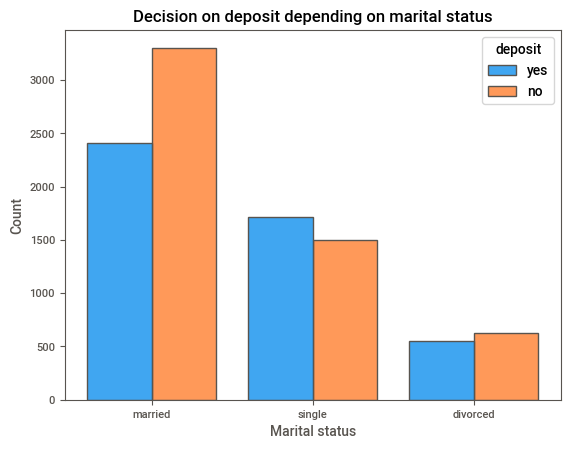

In [111]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
marital_histplot = sns.histplot(
    data=cleaned,
    x='marital', 
    hue='deposit',
    shrink=0.8,
    discrete=True,
    multiple='dodge',
    legend=True)
marital_histplot.set(xlabel='Marital status')
marital_histplot.set(title='Decision on deposit depending on marital status');

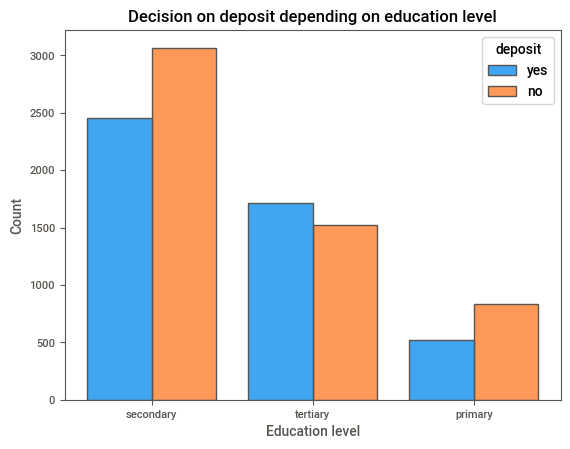

In [112]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
edu_histplot = sns.histplot(
    data=cleaned,
    x='education', 
    hue='deposit',
    shrink=0.8,
    discrete=True,
    multiple='dodge',
    legend=True)
edu_histplot.set(xlabel='Education level')
edu_histplot.set(title='Decision on deposit depending on education level');

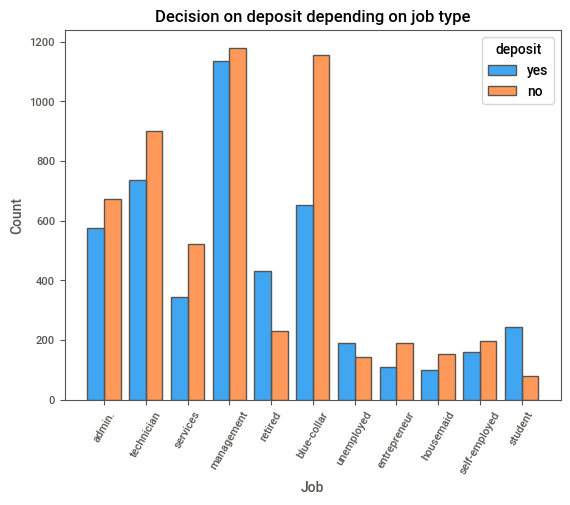

In [113]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
job_histplot = sns.histplot(
    data=cleaned,
    x='job', 
    hue='deposit',
    shrink=0.8,
    discrete=True,
    multiple='dodge',
    legend=True)
job_histplot.set(xlabel='Job')
job_histplot.xaxis.set_tick_params(rotation=60)
job_histplot.set(title='Decision on deposit depending on job type');

### Задание 11

In [114]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

cleaned.groupby(by=['deposit', 'education', 'marital'])['deposit'].count()

deposit  education  marital 
no       primary    divorced      91
                    married      641
                    single       100
         secondary  divorced     370
                    married     1830
                    single       866
         tertiary   divorced     163
                    married      832
                    single       531
yes      primary    divorced      96
                    married      339
                    single        82
         secondary  divorced     283
                    married     1289
                    single       879
         tertiary   divorced     174
                    married      784
                    single       755
Name: deposit, dtype: int64

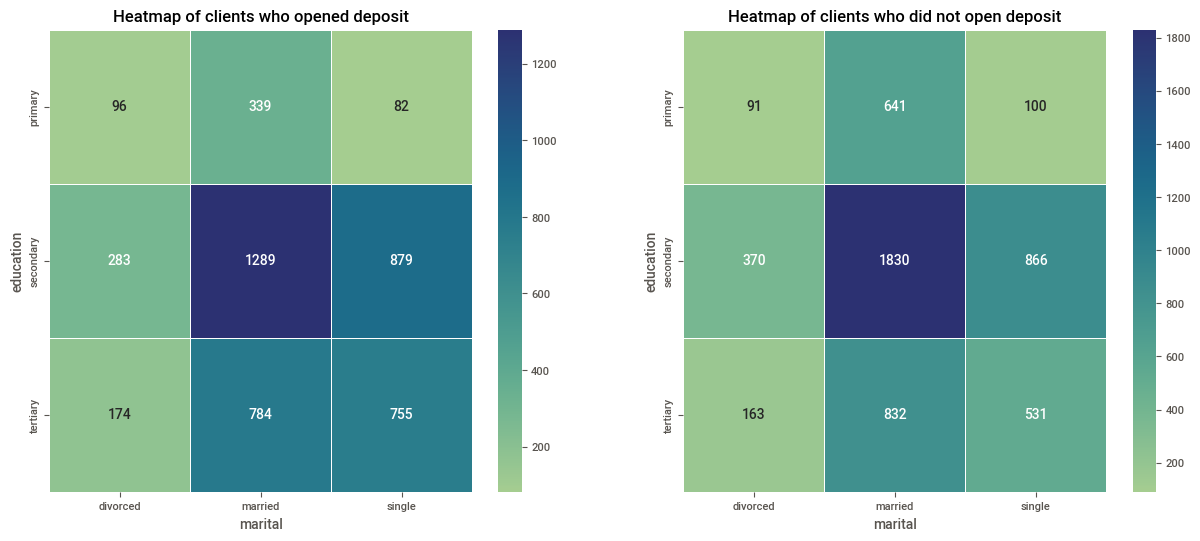

In [115]:
deposit_yes = success.pivot_table(
    index='education', 
    columns='marital', 
    values='deposit', 
    aggfunc='count'
    )
deposit_no = failure.pivot_table(
    index='education', 
    columns='marital', 
    values='deposit', 
    aggfunc='count'
    )
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
heatmap_yes = sns.heatmap(
    deposit_yes, 
    cmap='crest', 
    ax=axes[0], 
    annot=True, 
    linewidth=.5, 
    fmt='.0f'
    )
heatmap_no = sns.heatmap(
    deposit_no, 
    cmap='crest', 
    ax=axes[1], 
    annot=True, 
    linewidth=.5, 
    fmt='.0f'
    )
heatmap_yes.set(
    title='Heatmap of clients who opened deposit'
    )
heatmap_no.set(
    title='Heatmap of clients who did not open deposit'
    );

## Часть 3: преобразование данных

### Задание 1

In [116]:
cleaned

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no   2343.0     yes   no   
1       56       admin.  married  secondary      no     45.0      no   no   
2       41   technician  married  secondary      no   1270.0     yes   no   
3       55     services  married  secondary      no   2476.0     yes   no   
4       54       admin.  married   tertiary      no    184.0      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no      1.0     yes   no   
11158   39     services  married  secondary      no    733.0      no   no   
11159   32   technician   single  secondary      no     29.0      no   no   
11160   43   technician  married  secondary      no      0.0      no  yes   
11161   34   technician  married  secondary      no      0.0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit age_category  
0         yes        50-60  
1         yes        50-60  
2         yes        40-50  
3         yes        50-60  
4         yes        50-60  
...       ...          ...  
11157      no        30-40  
11158      no        30-40  
11159      no        30-40  
11160      no        40-50  
11161      no        30-40  

[10105 rows x 18 columns]

In [117]:
# преобразуйте уровни образования
le = LabelEncoder()
cleaned['education'] = le.fit_transform(cleaned['education'])
cleaned['age_category'] = le.fit_transform(cleaned['age_category'])
cleaned['education'].sum()

11995

### Задания 2 и 3

In [118]:
# преобразуйте бинарные переменные в представление из нулей и единиц
cleaned['deposit'] = cleaned['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
round(cleaned['deposit'].std(), 3)

0.499

In [119]:
cleaned['default'] = cleaned['default'].apply(lambda x: 1 if x == 'yes' else 0)
cleaned['housing'] = cleaned['housing'].apply(lambda x: 1 if x == 'yes' else 0)
cleaned['loan'] = cleaned['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [120]:
res = cleaned['default'].mean() + cleaned['housing'].mean() + cleaned['loan'].mean()
print(round(res, 3))

0.635


### Задание 4

In [121]:
# создайте дамми-переменные
dum = pd.get_dummies(
    cleaned, 
    columns=[
        'job', 
        'marital', 
        'contact', 
        'month', 
        'poutcome'
        ]
    )
dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   education          10105 non-null  int64  
 2   default            10105 non-null  int64  
 3   balance            10105 non-null  float64
 4   housing            10105 non-null  int64  
 5   loan               10105 non-null  int64  
 6   day                10105 non-null  int64  
 7   duration           10105 non-null  int64  
 8   campaign           10105 non-null  int64  
 9   pdays              10105 non-null  int64  
 10  previous           10105 non-null  int64  
 11  deposit            10105 non-null  int64  
 12  age_category       10105 non-null  int64  
 13  job_admin.         10105 non-null  uint8  
 14  job_blue-collar    10105 non-null  uint8  
 15  job_entrepreneur   10105 non-null  uint8  
 16  job_housemaid      101

### Задания 5 и 6

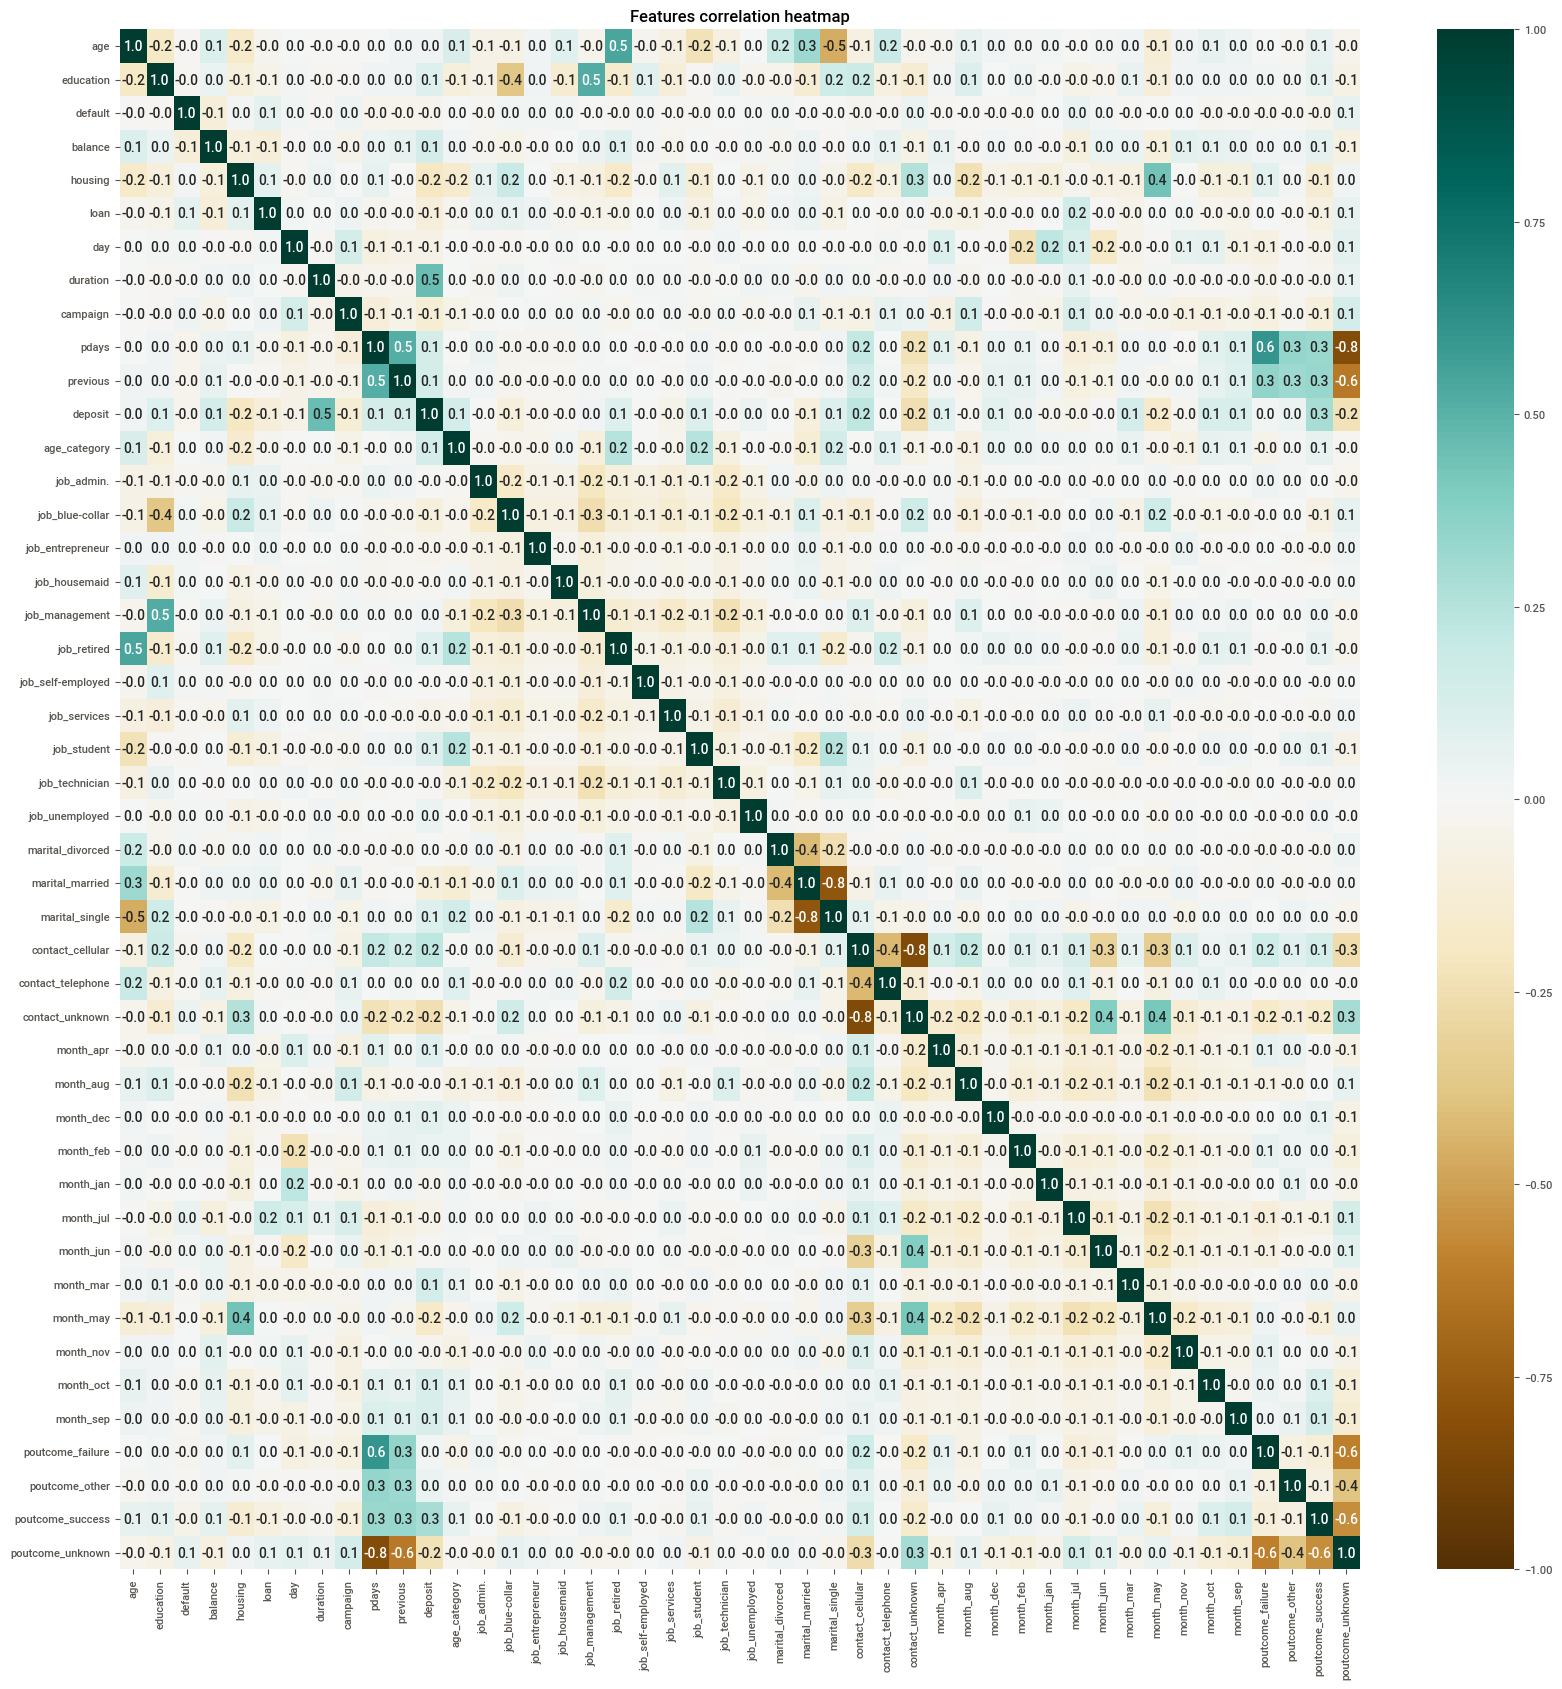

In [122]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
fig = plt.figure(figsize=(20, 20))
heatmap_dum = sns.heatmap(
    dum.corr(), 
    vmin=-1, 
    vmax=1, 
    annot=True, 
    cmap='BrBG', 
    fmt='.1f'
    )
heatmap_dum.set(
    title='Features correlation heatmap'
    );


### Задания 7 и 8

In [123]:
X = dum.drop(['deposit'], axis=1)
y = dum['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [124]:
# рассчитайте необходимые показатели
print(X_test.shape[0])
print(round(y_test.mean(), 2))

3335
0.46


### Задание 9

In [125]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X_train, y_train)
print(selector.get_feature_names_out())

X_train = selector.transform(X_train)
X_test = selector.transform(X_test)


['balance' 'housing' 'duration' 'campaign' 'pdays' 'previous'
 'age_category' 'contact_cellular' 'contact_unknown' 'month_mar'
 'month_may' 'month_oct' 'month_sep' 'poutcome_success' 'poutcome_unknown']


### Задание 10

In [126]:
# нормализуйте данные с помощью minmaxsxaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

round(X_test_scaled[:, 0].mean(), 2)

0.47

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [127]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000
    )

log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

print(f'Accuracy score for train: {round(metrics.accuracy_score(y_train_pred, y_train), 2)}')
print(f'Accuracy score for test: {round(metrics.accuracy_score(y_test_pred, y_test), 2)}')


Accuracy score for train: 0.82
Accuracy score for test: 0.8


### Задания 2,3,4

In [135]:
# обучите решающие деревья, настройте максимальную глубину
dec_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)

dec_tree.fit(X_train_scaled, y_train)
y_train_pred = dec_tree.predict(X_train_scaled)
y_test_pred = dec_tree.predict(X_test_scaled)

print(f'Accuracy score for train: {round(metrics.accuracy_score(y_train_pred, y_train), 2)}')
print(f'Accuracy score for test: {round(metrics.accuracy_score(y_test_pred, y_test), 2)}')

Accuracy score for train: 1.0
Accuracy score for test: 0.75


### Задание 5

In [155]:
param_grid = {
    'min_samples_split': [2, 5, 7, 10],
    'max_depth': [3, 5, 6, 7]
    } 

grid_search = GridSearchCV(
    estimator=dec_tree,
    param_grid=param_grid,
    cv=5,
    n_jobs = -1
)  
%time 
grid_search.fit(X_train_scaled, y_train) 
y_train_pred = grid_search.predict(X_train_scaled)
y_test_pred = grid_search.predict(X_test_scaled)

print(f'Accuracy score for train: {round(metrics.accuracy_score(y_train_pred, y_train), 2)}')
print(f'Accuracy score for test: {round(metrics.accuracy_score(y_test_pred, y_test), 2)}')
print(f'F1 score for train: {round(metrics.f1_score(y_train_pred, y_train), 2)}')
print(f'F1 score for test: {round(metrics.f1_score(y_test_pred, y_test), 2)}')
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 14 µs, sys: 3 µs, total: 17 µs
Wall time: 29.6 µs
Accuracy score for train: 0.84
Accuracy score for test: 0.82
F1 score for train: 0.82
F1 score for test: 0.81
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 10}


In [152]:
dec_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42, 
    max_depth=7,
    min_samples_split=10
)

dec_tree.fit(X_train_scaled, y_train)
y_train_pred = dec_tree.predict(X_train_scaled)
y_test_pred = dec_tree.predict(X_test_scaled)

print(f'F1 score for train: {round(metrics.f1_score(y_train_pred, y_train), 2)}')
print(f'F1 score for test: {round(metrics.f1_score(y_test_pred, y_test), 2)}')

F1 score for train: 0.82
F1 score for test: 0.81


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [157]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)

rf.fit(X_train_scaled, y_train)
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

print(f'Accuracy score for train: {round(metrics.accuracy_score(y_train_pred, y_train), 2)}')
print(f'Accuracy score for test: {round(metrics.accuracy_score(y_test_pred, y_test), 2)}')
print(f'Recall score for train: {round(metrics.recall_score(y_train_pred, y_train), 2)}')
print(f'Recall score for test: {round(metrics.recall_score(y_test_pred, y_test), 2)}')

Accuracy score for train: 0.86
Accuracy score for test: 0.83
Recall score for train: 0.84
Recall score for test: 0.8


### Задания 2 и 3

In [167]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
%time gb.fit(X_train_scaled, y_train)
y_train_pred = gb.predict(X_train_scaled)
y_test_pred = gb.predict(X_test_scaled)
print(f'Classification report for train:\n {metrics.classification_report(y_train_pred, y_train)}')
print(f'Classification report for test:\n {metrics.classification_report(y_test_pred, y_test)}')

CPU times: user 17min 7s, sys: 3.59 s, total: 17min 10s
Wall time: 17min 13s
Classification report for train:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      3581
           1       0.89      0.87      0.88      3189

    accuracy                           0.89      6770
   macro avg       0.89      0.89      0.89      6770
weighted avg       0.89      0.89      0.89      6770

Classification report for test:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1731
           1       0.83      0.80      0.82      1604

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [172]:
# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
    ('lr', log_reg),
    ('dt', dec_tree),
    ('gb', gb),
    ('rf', rf)    
]
#Создаем объект класса стекинг
reg = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=log_reg
)
#Обучаем модель
reg.fit(X_train_scaled, y_train)
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)
print(f'Classification report for train:\n {metrics.classification_report(y_train_pred, y_train)}')
print(f'Classification report for test:\n {metrics.classification_report(y_test_pred, y_test)}')
print(f'Precision score for train: {round(metrics.precision_score(y_train_pred, y_train), 2)}')
print(f'Precision score for test: {round(metrics.precision_score(y_test_pred, y_test), 2)}')

Classification report for train:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      3597
           1       0.86      0.85      0.86      3173

    accuracy                           0.87      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.87      0.87      0.87      6770

Classification report for test:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1762
           1       0.82      0.80      0.81      1573

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335

Precision score for train: 0.86
Precision score for test: 0.82


### Задание 5

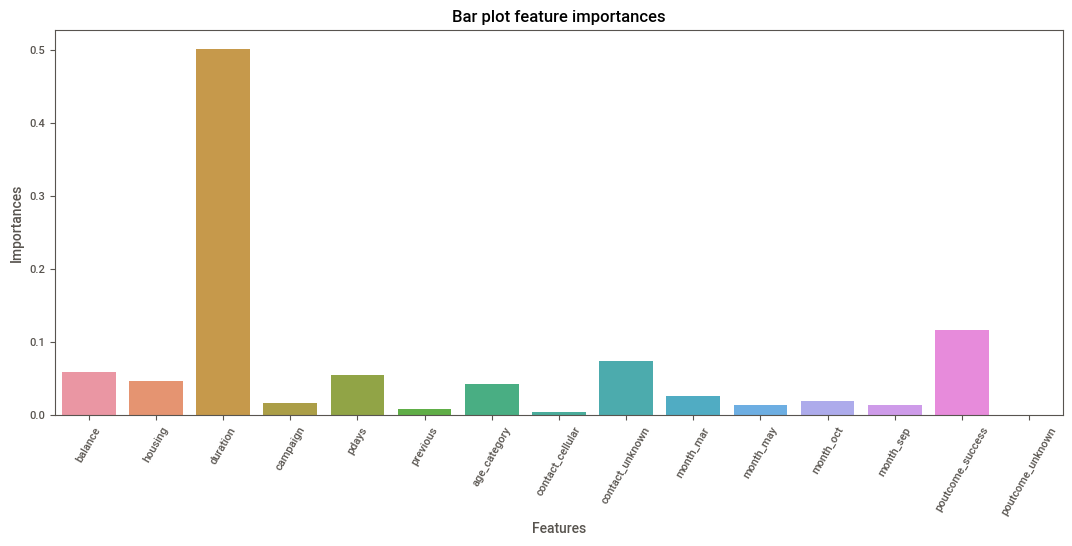

In [180]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X[selector.get_feature_names_out()].columns #признаки
feature_importances = gb.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=60)
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

### Задания 6,7,8

In [184]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 7.1 MB/s eta 0:00:00


In [188]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=13)

# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

[I 2023-02-22 15:13:23,466] A new study created in memory with name: RandomForestClassifier
[I 2023-02-22 15:13:49,853] Trial 0 finished with value: 0.8444374607165306 and parameters: {'n_estimators': 191, 'max_depth': 20, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8444374607165306.
[I 2023-02-22 15:14:15,367] Trial 1 finished with value: 0.8444724013209624 and parameters: {'n_estimators': 186, 'max_depth': 19, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.8444724013209624.
[I 2023-02-22 15:14:34,718] Trial 2 finished with value: 0.913077525450274 and parameters: {'n_estimators': 129, 'max_depth': 18, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.913077525450274.
[I 2023-02-22 15:14:53,108] Trial 3 finished with value: 0.9155304811158126 and parameters: {'n_estimators': 133, 'max_depth': 19, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.9155304811158126.
[I 2023-02-22 15:15:14,229] Trial 4 finished with value: 0.845247446975648 and parameters: {'n_e

Наилучшие значения гиперпараметров {'n_estimators': 133, 'max_depth': 19, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [189]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82
